import numpy as np
import pandas as pd
from statsmodels.datasets import grunfeld
from linearmodels import PanelOLS
from linearmodels import FamaMacBeth
import time
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("C:/1-Tsinghua/第三年/计量2/project/fama1.csv")
data1=data

In [41]:
type(data['month'][1])

str

In [45]:
type(data['timestamp'][1])

numpy.float64

In [43]:
data['timestamp'] = data['month'].apply(lambda x:time.mktime(time.strptime(x,'%Y-%m')))

In [44]:
data.head()

,stkcd,stkcd_str,year,month,IV,IS,momentum,turnover,marketvalue,month2,_stat_1,_stat_2,_stat_3,_stat_4,_stat_5,_b_cons,EIS,monthreturn,monthreturn2,timestamp
0,1,1,2011,2011-01,0.011657,-0.154883,-0.294470,15.7912,5.335556e+10,2011-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030399,0.040496,1.293811e+09
1,1,1,2011,2011-02,0.011518,-0.068937,-0.290423,13.2757,5.551627e+10,2011-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040496,0.009416,1.296490e+09
2,1,1,2011,2011-03,0.011100,-0.174547,-0.306897,24.9061,5.603902e+10,2011-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009416,0.131841,1.298909e+09
3,1,1,2011,2011-04,0.011885,0.252071,-0.114786,32.2970,6.342725e+10,2011-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131841,-0.033409,1.301587e+09
4,1,1,2011,2011-06,0.011736,0.351524,-0.025128,13.8567,5.948918e+10,2011-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.033409,0.015817,1.306858e+09


In [46]:
datax=data.set_index(['stkcd','timestamp'])

In [86]:
stknum = data["stkcd"].drop_duplicates()
stkcd=data["stkcd"]
allstk = []
for i in stknum:
    allstk.append(i)

In [116]:
newlist2=[]
for i in newlist:
    count = 0
    num=i
    for j in stkcd:
        if num ==j:
            count+=1
        else:
            pass
    #print(num,count)
    if count >=100:
        newlist2.append(num)

In [118]:
len(newlist2)

1306

In [119]:
dlist=list(set(allstk).difference(set(newlist2)))
data1=data1[~data1['stkcd'].isin(dlist)]
stknum2 = data1["stkcd"].drop_duplicates()

In [108]:
x=list(stknum2)

In [122]:
dataz=data1.set_index(['stkcd','timestamp'])

In [123]:
fama2=FamaMacBeth(dataz.monthreturn2,dataz.EIS).fit(cov_type='kernel',debiased=True)

In [129]:
fama3=FamaMacBeth(dataz.monthreturn2,dataz[["EIS","IV"]]).fit(cov_type='kernel',debiased=True)

In [162]:
group=data1.groupby('stkcd')
r=group['monthreturn'].mean()
eis=group['EIS'].mean()

1306

In [131]:
fama4=FamaMacBeth(dataz.monthreturn,dataz.EIS).fit(cov_type='kernel',debiased=True)

In [124]:
print(fama2)

                            FamaMacBeth Estimation Summary                           
Dep. Variable:                monthreturn2   R-squared:                        0.0083
Estimator:                     FamaMacBeth   R-squared (Between):              0.5649
No. Observations:                   119479   R-squared (Within):               0.0009
Date:                     Fri, Jun 05 2020   R-squared (Overall):              0.0083
Time:                             17:40:56   Log-likelihood                 7.505e+04
Cov. Estimator:    Fama-MacBeth Kernel Cov                                           
                                             F-statistic:                      997.83
Entities:                             1304   P-value                           0.0000
Avg Obs:                            91.625   Distribution:                F(1,119478)
Min Obs:                            87.000                                           
Max Obs:                            95.000   F-statist

In [125]:
dataz

stkcd_str  year    month        IV        IS  momentum  \
stkcd  timestamp                                                              
1      1.293811e+09          1  2011  2011-01  0.011657 -0.154883 -0.294470   
       1.296490e+09          1  2011  2011-02  0.011518 -0.068937 -0.290423   
       1.298909e+09          1  2011  2011-03  0.011100 -0.174547 -0.306897   
       1.301587e+09          1  2011  2011-04  0.011885  0.252071 -0.114786   
       1.306858e+09          1  2011  2011-06  0.011736  0.351524 -0.025128   
...                        ...   ...      ...       ...       ...       ...   
601999 1.564589e+09     601999  2019  2019-08  0.015734  0.831722  0.124949   
       1.567267e+09     601999  2019  2019-09  0.015726  0.823324  0.090743   
       1.569859e+09     601999  2019  2019-10  0.015856  0.796919  0.175853   
       1.572538e+09     601999  2019  2019-11  0.015110  0.750130 -0.027382   
       1.575130e+09     601999  2019  2019-12  0.016655  1.376733  0.197799   

                     turnover   marketvalue   month2   _stat_1    _stat_2  \
stkcd  timestamp                                                            
1      1.293811e+09   15.7912  5.335556e+10  2011-01       NaN        NaN   
       1.296490e+09   13.2757  5.551627e+10  2011-02       NaN        NaN   
       1.298909e+09   24.9061  5.603902e+10  2011-03       NaN        NaN   
       1.301587e+09   32.2970  6.342725e+10  2011-04       NaN        NaN   
       1.306858e+09   13.8567  5.948918e+10  2011-06       NaN        NaN   
...                       ...           ...      ...       ...        ...   
601999 1.564589e+09    4.7654  3.156741e+09  2019-08  0.113172  -9.221270   
       1.567267e+09    5.4474  3.096141e+09  2019-09  0.105772 -11.501519   
       1.569859e+09    3.7083  3.096141e+09  2019-10  0.104082 -13.577970   
       1.572538e+09    5.0483  2.892302e+09  2019-11  0.119669 -10.613887   
       1.575130e+09   20.5868  3.283452e+09  2019-12  0.139203 -12.256909   

                      _stat_3   _stat_4       _stat_5   _b_cons       EIS  \
stkcd  timestamp                                                            
1      1.293811e+09       NaN       NaN           NaN       NaN       NaN   
       1.296490e+09       NaN       NaN           NaN       NaN       NaN   
       1.298909e+09       NaN       NaN           NaN       NaN       NaN   
       1.301587e+09       NaN       NaN           NaN       NaN       NaN   
       1.306858e+09       NaN       NaN           NaN       NaN       NaN   
...                       ...       ...           ...       ...       ...   
601999 1.564589e+09 -0.949675  0.000254 -4.529688e-13  0.703525  0.533689   
       1.567267e+09 -0.830157  0.000411 -5.412297e-13  0.797074  0.628519   
       1.569859e+09 -0.844911 -0.000195 -4.356046e-13  0.824811  0.541810   
       1.572538e+09 -0.909350 -0.000265 -5.818501e-13  0.810475  0.761745   
       1.575130e+09 -0.833088 -0.000442 -6.472790e-13  0.885262  0.696770   

                     monthreturn  monthreturn2  
stkcd  timestamp                                
1      1.293811e+09    -0.030399      0.040496  
       1.296490e+09     0.040496      0.009416  
       1.298909e+09     0.009416      0.131841  
       1.301587e+09     0.131841     -0.033409  
       1.306858e+09    -0.033409      0.015817  
...                          ...           ...  
601999 1.564589e+09    -0.030457     -0.019197  
       1.567267e+09    -0.019197      0.000000  
       1.569859e+09     0.000000     -0.065836  
       1.572538e+09    -0.065836      0.135238  
       1.575130e+09     0.135238           NaN  

[136352 rows x 18 columns]

In [130]:
fama3

Dep. Variable:,monthreturn2,R-squared:,0.0080
Estimator:,FamaMacBeth,R-squared (Between):,0.5374
No. Observations:,119479,R-squared (Within):,0.0010
Date:,"Fri, Jun 05 2020",R-squared (Overall):,0.0080
Time:,18:06:14,Log-likelihood,7.503e+04
Cov. Estimator:,Fama-MacBeth Kernel Cov,,
,,F-statistic:,482.07
Entities:,1304,P-value,0.0000
Avg Obs:,91.625,Distribution:,"F(2,119477)"
Min Obs:,87.000,,
Max Obs:,95.000,F-statistic (robust):,3.0667


In [132]:
fama4

Dep. Variable:,monthreturn,R-squared:,-4.454e-05
Estimator:,FamaMacBeth,R-squared (Between):,0.4074
No. Observations:,120783,R-squared (Within):,-0.0053
Date:,"Fri, Jun 05 2020",R-squared (Overall):,-4.454e-05
Time:,18:08:35,Log-likelihood,7.57e+04
Cov. Estimator:,Fama-MacBeth Kernel Cov,,
,,F-statistic:,-5.3798
Entities:,1304,P-value,1.0000
Avg Obs:,92.625,Distribution:,"F(1,120782)"
Min Obs:,88.000,,
Max Obs:,96.000,F-statistic (robust):,0.5521


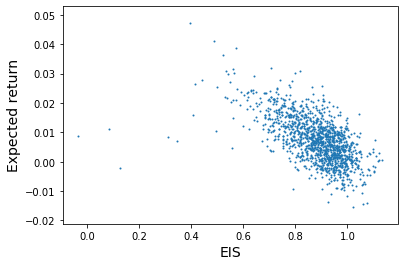

In [164]:
x=list(dataz['EIS'])
y=list(dataz['monthreturn'])
y2=list(dataz['monthreturn2'])
plt.scatter(eis,r,s=1)
plt.xlabel("EIS",fontsize=14)
plt.ylabel("Expected return",fontsize=14)
plt.show()

In [218]:
sorting=pd.DataFrame(columns=['EIS','return'])

In [220]:
sorting['EIS']=eis
sorting['return']=r

In [223]:
quantiles=[]
quantiles.append(sorting['EIS'].min()-a)
quantiles.append(sorting['EIS'].quantile(q=0.20))
quantiles.append(sorting['EIS'].quantile(q=0.40))
quantiles.append(sorting['EIS'].quantile(q=0.60))
quantiles.append(sorting['EIS'].quantile(q=0.80))
quantiles.append(sorting['EIS'].quantile(q=0.80)+a)

In [235]:
fenzu = pd.qcut(sorting['EIS'],5)

In [236]:
pd.value_counts(fenzu) 

(0.97, 1.133]       261
(0.923, 0.97]       261
(0.796, 0.876]      261
(-0.0346, 0.796]    261
(0.876, 0.923]      260
Name: EIS, dtype: int64

In [234]:
sorting=sorting.sort_values(by=['EIS'])

In [244]:
rr=[]
num=13
for i in range(100):
    m=sorting['return'][num*i:num*i+num].mean()
    rr.append(m)

In [250]:
mean=[]
num=13
for i in range(100):
    m=sorting['EIS'][num*i:num*i+num].mean()
    mean.append(m)

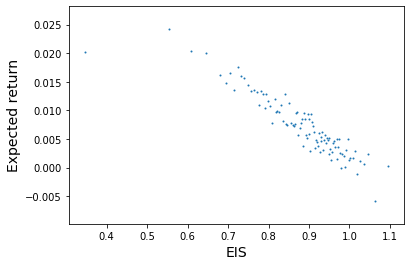

In [252]:
plt.scatter(mean,rr,s=1)
plt.xlabel("EIS",fontsize=14)
plt.ylabel("Expected return",fontsize=14)
plt.show()

In [243]:
rr

[0.015505089829099799,
 0.009252535468150906,
 0.006496471456859848,
 0.004250108364722645,
 0.001490423025751835]

In [239]:
len(sorting['EIS'])

1306